<a href="https://colab.research.google.com/github/nhatminh46vn/DL-handson/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import random

print( f'tensorflow version {tf.__version__} \nKeras : {keras.__version__}')

tensorflow version 2.17.0 
Keras : 3.4.1


In [94]:
((X_train, y_train), ( X_test, y_test)) = keras.datasets.fashion_mnist.load_data()

In [95]:
print(f'shape cua X_train : {X_train.shape[0]} anh va kich thuoc {X_train.shape[1:]}')

shape cua X_train : 60000 anh va kich thuoc (28, 28)


In [109]:
class_names = ["T-shirt/top", "Trousser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_nums = len(class_names)

class_names[y_train[56]]

'shirt'

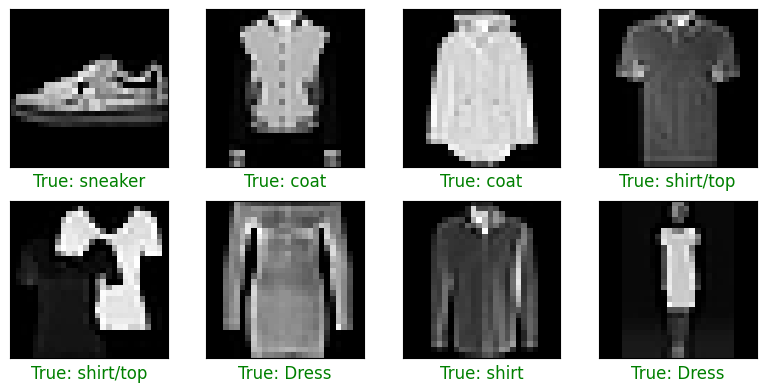

In [162]:
from typing import Optional

def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba : Optional[np.ndarray]= None ) -> None:

  nrows, ncols = 2, 4

  fig, axes = plt.subplots(nrows, ncols, figsize = (8,4))
  len_x = x_data.shape[0]   # trich xuat phan tu dau tien cua tuple np.ndarray
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]  #chia lay phan nguyen , va chia lay phan du
    img_idx = random.randint(0, len_x)
    ax.imshow(x_data[img_idx], cmap='gray')
    ax.set(xticks = [], yticks=[])

    color = 'green'

    true_label_str = f'True: {class_names[y_data[img_idx]]}'

    if y_proba is not None:
      predicted_idx = np.argmax(y_proba[img_idx])
      predicted_label = class_names[predicted_idx]
      color = 'red' if predicted_idx != y_data[img_idx] else color
      predicted_label_str = f"\nPredicted: {predicted_label}"

    img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str

    ax.set_xlabel(img_title, color=color, fontsize =12 )

  plt.tight_layout()
  plt.show()


plot_data(X_test, y_test)


# 2. Image pre processing
 * Reshaping it into the shape of model expects and scaling it so that all values are in the [0,1] interval
 * transform from unit8 to float 32


In [96]:
 # Convert to float32 & scale images to the [0,1] range for training
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255


In [97]:
X_test.shape , X_test.dtype

((10000, 28, 28), dtype('float32'))

In [98]:
# Make sure image have shape (60000,28,28,1) to fit with the convention of tensor flow  ( Samples , H , W , Chanel )- channel last . In pytorch the order is folow ( samples , chanel , H , W )

X_train = np.expand_dims(X_train, axis = -1 )
X_test  = np.expand_dims(X_test, axis = -1)

In [99]:
X_train.shape , X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [100]:
# convert class vector to binary class matrices : 1 [ 0 ,1 ,0,...] using one hot

y_train_label = keras.utils.to_categorical(y_train, len(class_names))
y_test_label = keras.utils.to_categorical(y_test, len(class_names))

In [101]:
y_train[0]  , y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

 # 3 Network ANN Architecture

In [107]:
input_shape = (28,28,1)

In [135]:
model = keras.models.Sequential([
     layers.Flatten(input_shape = input_shape),   # 28x28 -> 784
     layers.Dense(512, activation = "relu"),
     layers.Dense(256, activation = "relu"),
     layers.Dense(class_nums, activation ="softmax")




])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics = ['accuracy'])

In [137]:
epochs = 10
batch_size = 128
history = model.fit(X_train, y_train_label,
          epochs = epochs,
          batch_size = batch_size,
          validation_split = 0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7318 - loss: 0.7438 - val_accuracy: 0.8155 - val_loss: 0.4767
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8512 - loss: 0.3991 - val_accuracy: 0.8767 - val_loss: 0.3403
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8760 - loss: 0.3354 - val_accuracy: 0.8632 - val_loss: 0.3703
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8838 - loss: 0.3073 - val_accuracy: 0.8792 - val_loss: 0.3247
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8908 - loss: 0.2866 - val_accuracy: 0.8798 - val_loss: 0.3440
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8965 - loss: 0.2727 - val_accuracy: 0.8818 - val_loss: 0.3262
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9023 - loss: 0.2554 - val_accuracy: 0.8835 - val_loss: 0.3241
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9082 - loss: 0.2413 - val_a

In [138]:
history_dict = history.history

In [139]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [145]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc , val_acc = history_dict['accuracy'], history_dict['val_accuracy']

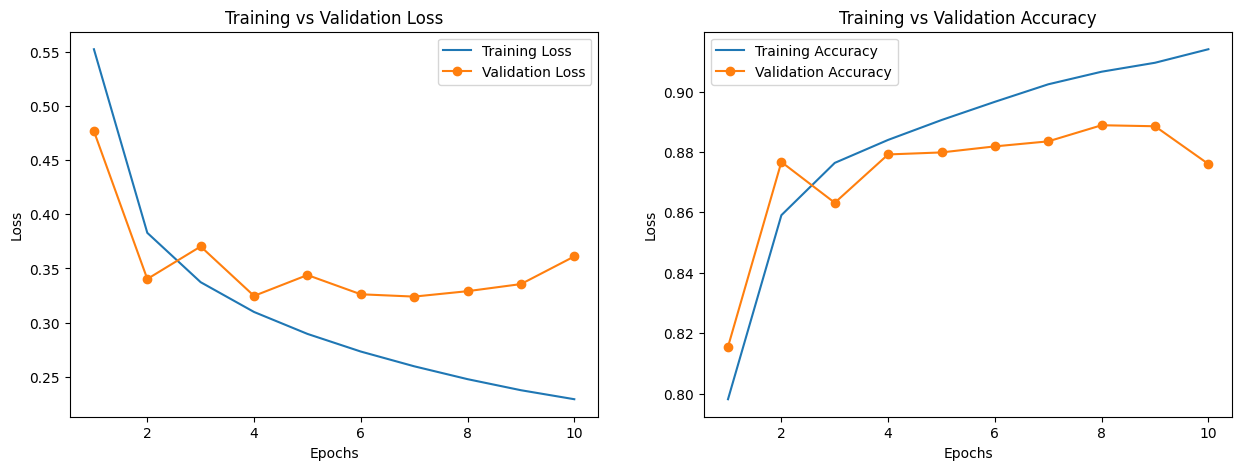

In [152]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
epochs_runs =  [i+1 for i in range(epochs)]
ax1.plot(epochs_runs, train_loss, label = 'Training Loss')
ax1.plot(epochs_runs, val_loss, label = 'Validation Loss', marker = 'o')
ax1.set ( title = 'Training vs Validation Loss', xlabel = 'Epochs', ylabel = 'Loss')
ax1.legend()


ax2.plot(epochs_runs, train_acc, label = 'Training Accuracy')
ax2.plot(epochs_runs, val_acc, label = 'Validation Accuracy', marker = 'o')
ax2.set ( title = 'Training vs Validation Accuracy', xlabel = 'Epochs', ylabel = 'Loss')
ax2.legend()
plt.show()

# 4. Model Evaluation

In [153]:
Score = model.evaluate(X_test, y_test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8743 - loss: 0.3903


In [154]:
print( f'test Loss: {Score[0]:.4f}')
print(f'test Accuracy: {Score[1]:.4f}')

test Loss: 0.3823
test Accuracy: 0.8766


#5. Prediction

In [155]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [157]:
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [160]:
predictions = np.argmax(y_proba, axis = 1)

In [161]:
[class_names[pred] for pred in predictions ]

['ankle boot', 'Pullover', 'Trousser']

In [163]:
y_proba = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


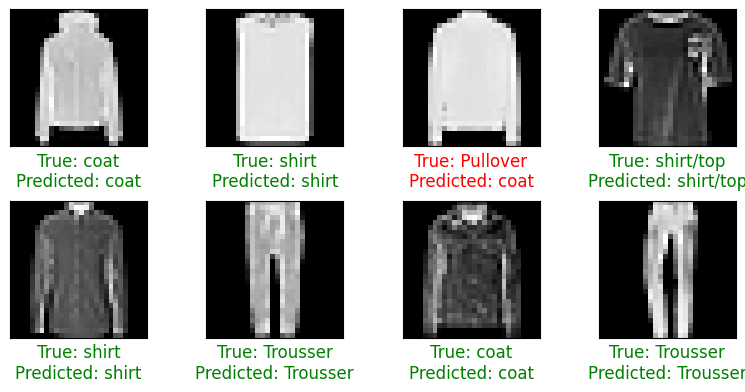

In [171]:
plot_data(X_test,y_test, y_proba)